# [DataCamp Course](https://www.datacamp.com/courses/machine-learning-with-tree-based-models-in-python)

## Generate a Classification-tree in scikit-learn

In [1]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#Import train_test_split
from sklearn.model_selection import train_test_split
#Import accuracy_score
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd
url = 'indian_liver_patient_preprocessed.csv'
data = pd.read_csv(url, index_col=0)

X = data.drop(labels=['Total_Bilirubin_std',
                      'Liver_disease',
                     'Direct_Bilirubin_std',
                     'Alkaline_Phosphotase_std',
                     'Alamine_Aminotransferase_std',
                     'Aspartate_Aminotransferase_std',
                     'Albumin_std',
                     'Albumin_and_Globulin_Ratio_std',
                     'Is_male_std'], axis=1)
y = data.Liver_disease

In [3]:
data.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age_std             579 non-null    float64
 1   Total_Protiens_std  579 non-null    float64
dtypes: float64(2)
memory usage: 13.6 KB


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=1)

In [6]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

In [7]:
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

0.6724137931034483

## Decision Regions
region in the feature space where all instances are assigned to one class label
## Decision Boundary
surface separating different decision regions

In [8]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 1 1 1]


In [9]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.66


## Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

In [10]:
def plot_decision_regions(X, y, clf,
                          feature_index=None,
                          filler_feature_values=None,
                          filler_feature_ranges=None,
                          ax=None,
                          X_highlight=None,
                          res=0.02, legend=1,
                          hide_spines=True,
                          markers='s^oxv<>',
                          colors='red,blue,limegreen,gray,cyan'):
                              """Plot decision regions of a classifier.
                          
                              Please note that this functions assumes that class labels are
                              labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
                              labels with integer labels > 4, you may want to provide additional colors
                              and/or markers as `colors` and `markers` arguments.
                              See http://matplotlib.org/examples/color/named_colors.html for more
                              information.
                          
                              Parameters
                              ----------
                              X : array-like, shape = [n_samples, n_features]
                                  Feature Matrix.
                              y : array-like, shape = [n_samples]
                                  True class labels.
                              clf : Classifier object.
                                  Must have a .predict method.
                              feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
                                  Feature indices to use for plotting. The first index in
                                  `feature_index` will be on the x-axis, the second index will be
                                  on the y-axis.
                              filler_feature_values : dict (default: None)
                                  Only needed for number features > 2. Dictionary of feature
                                  index-value pairs for the features not being plotted.
                              filler_feature_ranges : dict (default: None)
                                  Only needed for number features > 2. Dictionary of feature
                                  index-value pairs for the features not being plotted. Will use the
                                  ranges provided to select training samples for plotting.
                              ax : matplotlib.axes.Axes (default: None)
                                  An existing matplotlib Axes. Creates
                                  one if ax=None.
                              X_highlight : array-like, shape = [n_samples, n_features] (default: None)
                                  An array with data points that are used to highlight samples in `X`.
                              res : float or array-like, shape = (2,) (default: 0.02)
                                  Grid width. If float, same resolution is used for both the x- and
                                  y-axis. If array-like, the first item is used on the x-axis, the
                                  second is used on the y-axis. Lower values increase the resolution but
                                  slow down the plotting.
                              hide_spines : bool (default: True)
                                  Hide axis spines if True.
                              legend : int (default: 1)
                                  Integer to specify the legend location.
                                  No legend if legend is 0.
                              markers : str (default \'s^oxv<>\')
                                  Scatterplot markers.
                              colors : str (default \'red,blue,limegreen,gray,cyan\')
                                  Comma separated list of colors.
                          
                              Returns
                              ---------
                              ax : matplotlib.axes.Axes object
                          
                              """
                          
                              # check_Xy(X, y, y_int=True)  # Validate X and y arrays
                              dim = X.shape[1]
                          
                              if ax is None:
                                  ax = plt.gca()
                          
                              if isinstance(res, float):
                                  xres, yres = res, res
                              else:
                                  try:
                                      xres, yres = res
                                  except ValueError:
                                      raise ValueError('Unable to unpack res. Expecting \
                                                       array-like input of length 2.')
                          
                              plot_testdata = True
                              if not isinstance(X_highlight, np.ndarray):
                                  if X_highlight is not None:
                                      raise ValueError('X_highlight must be a NumPy array or None')
                                  else:
                                      plot_testdata = False
                              elif len(X_highlight.shape) < 2:
                                  raise ValueError('X_highlight must be a 2D array')
                          
                              if feature_index is not None:
                                  # Unpack and validate the feature_index values
                                  if dim == 1:
                                      raise ValueError(
                                          'feature_index requires more than one training feature')
                                  try:
                                      x_index, y_index = feature_index
                                  except ValueError:
                                      raise ValueError(
                                          'Unable to unpack feature_index. Make sure feature_index \
                                          only has two dimensions.')
                                  try:
                                      X[:, x_index], X[:, y_index]
                                  except IndexError:
                                      raise IndexError(
                                          'feature_index values out of range. X.shape is {}, but \
                                          feature_index is {}'.format(X.shape, feature_index))
                              else:
                                  feature_index = (0, 1)
                                  x_index, y_index = feature_index
                          
                              # Extra input validation for higher number of training features
                              if dim > 2:
                                  if filler_feature_values is None:
                                      raise ValueError('Filler values must be provided when \
                                                       X has more than 2 training features.')
                          
                                  if filler_feature_ranges is not None:
                                      if not set(filler_feature_values) == set(filler_feature_ranges):
                                          raise ValueError(
                                              'filler_feature_values and filler_feature_ranges must \
                                              have the same keys')
                          
                                  # Check that all columns in X are accounted for
                                  column_check = np.zeros(dim, dtype=bool)
                                  for idx in filler_feature_values:
                                      column_check[idx] = True
                                  for idx in feature_index:
                                      column_check[idx] = True
                                  if not all(column_check):
                                      missing_cols = np.argwhere(~column_check).flatten()
                                      raise ValueError(
                                          'Column(s) {} need to be accounted for in either \
                                          feature_index or filler_feature_values'.format(missing_cols))
                          
                              marker_gen = cycle(list(markers))
                          
                              n_classes = np.unique(y).shape[0]
                              colors = colors.split(',')
                              colors_gen = cycle(colors)
                              colors = [next(colors_gen) for c in range(n_classes)]
                          
                              # Get minimum and maximum
                              x_min, x_max = X[:, x_index].min() - 1, X[:, x_index].max() + 1
                              if dim == 1:
                                  y_min, y_max = -1, 1
                              else:
                                  y_min, y_max = X[:, y_index].min() - 1, X[:, y_index].max() + 1
                          
                              xx, yy = np.meshgrid(np.arange(x_min, x_max, xres),
                                                   np.arange(y_min, y_max, yres))
                          
                              if dim == 1:
                                  X_predict = np.array([xx.ravel()]).T
                              else:
                                  X_grid = np.array([xx.ravel(), yy.ravel()]).T
                                  X_predict = np.zeros((X_grid.shape[0], dim))
                                  X_predict[:, x_index] = X_grid[:, 0]
                                  X_predict[:, y_index] = X_grid[:, 1]
                                  if dim > 2:
                                      for feature_idx in filler_feature_values:
                                          X_predict[:, feature_idx] = filler_feature_values[feature_idx]
                              Z = clf.predict(X_predict)
                              Z = Z.reshape(xx.shape)
                              # Plot decision region
                              ax.contourf(xx, yy, Z,
                                          alpha=0.3,
                                          colors=colors,
                                          levels=np.arange(Z.max() + 2) - 0.5)
                              # ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
                              ax.axis([xx.min(), xx.max(), yy.min(), yy.max()])
                          
                              # Scatter training data samples
                              for idx, c in enumerate(np.unique(y)):
                                  if dim == 1:
                                      y_data = [0 for i in X[y == c]]
                                      x_data = X[y == c]
                                  elif dim == 2:
                                      y_data = X[y == c, y_index]
                                      x_data = X[y == c, x_index]
                                  elif dim > 2 and filler_feature_ranges is not None:
                                      class_mask = y == c
                                      feature_range_mask = get_feature_range_mask(
                                                      X, filler_feature_values=filler_feature_values,
                                                      filler_feature_ranges=filler_feature_ranges)
                                      y_data = X[class_mask & feature_range_mask, y_index]
                                      x_data = X[class_mask & feature_range_mask, x_index]
                                  else:
                                      continue
                          
                                  ax.scatter(x=x_data,
                                             y=y_data,
                                             alpha=0.8,
                                             c=colors[idx],
                                             marker=next(marker_gen),
                                             edgecolor='black',
                                             label=c)
                          
                              if hide_spines:
                                  ax.spines['right'].set_visible(False)
                                  ax.spines['top'].set_visible(False)
                                  ax.spines['left'].set_visible(False)
                                  ax.spines['bottom'].set_visible(False)
                              ax.yaxis.set_ticks_position('left')
                              ax.xaxis.set_ticks_position('bottom')
                              if dim == 1:
                                  ax.axes.get_yaxis().set_ticks([])
                          
                              if legend:
                                  if dim > 2 and filler_feature_ranges is None:
                                      pass
                                  else:
                                      handles, labels = ax.get_legend_handles_labels()
                                      ax.legend(handles, labels,
                                                framealpha=0.3, scatterpoints=1, loc=legend)
                          
                              if plot_testdata:
                                  if dim == 1:
                                      x_data = X_highlight
                                      y_data = [0 for i in X_highlight]
                                  elif dim == 2:
                                      x_data = X_highlight[:, x_index]
                                      y_data = X_highlight[:, y_index]
                                  else:
                                      feature_range_mask = get_feature_range_mask(
                                              X_highlight, filler_feature_values=filler_feature_values,
                                              filler_feature_ranges=filler_feature_ranges)
                                      y_data = X_highlight[feature_range_mask, y_index]
                                      x_data = X_highlight[feature_range_mask, x_index]
                          
                                  ax.scatter(x_data,
                                             y_data,
                                             c='',
                                             edgecolor='black',
                                             alpha=1.0,
                                             linewidths=1,
                                             marker='o',
                                             s=80)
                          
                              return ax


In [11]:
def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained
    in the 2D dataset (X,y) along with the decision
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
    if i == 0:
        ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
        plt.tight_layout()
        plt.show()

In [12]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14, 8)
plt.style.use('seaborn-whitegrid')

In [13]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

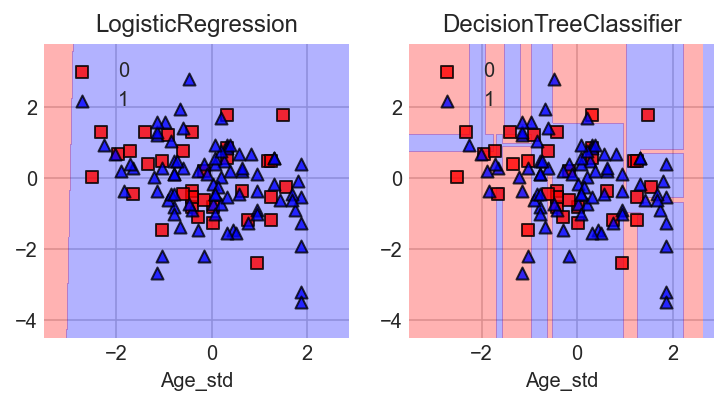

In [14]:
# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

## Decision-Tree

Data structure consisting of a hierarchy of nodes

## Node

question or prediction

## Root

_no_ parent node, question giving rise to _two_ children nodes

## Internal node

_one_ parent node, question giving rise to _two_ children nodes

## Leaf

_one_ parent node, _no_ children nodes. This is where predictions are made

## Information Gain (IG)

How does the algorithm know which feature and which split-point to choose? It does so by maximizing information gain. The tree considers that each node contains information and aims at maximizing the information gain after each split. 

- The existence of a node depends on the state of its predecessors.
- The impurity of a node can be determined using different criteria such as entropy and the gini-index.
- When the information gain resulting from splitting a node is null, the node is declared as a leaf.
- When an internal node is split, the split is performed in such a way so that information gain is maximized.

In [15]:
breast_cancer = pd.read_csv('wbc.csv', index_col=0)
y = breast_cancer.diagnosis

mapping = {'M':1, 'B':0}
y = y.map(mapping)

X = breast_cancer.drop('diagnosis', axis=1)
X = X.iloc[:, :30]

In [16]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se      

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

In [19]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [20]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

y_pred_g = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_pred_g, y_test)

In [21]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred, y_test)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9473684210526315
Accuracy achieved by using the gini index:  0.9473684210526315


# [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Decision tree for regression
```python
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
```

In [22]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

The target variable needs to be continuous in a regression problem. Therefore, the outcome of the model will be a *real number*.

In [23]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=3)
# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf=0.1,
                          random_state=3)

#Fit 'dt' to the training-set
dt.fit(X_train, y_train)

#Predict test-set labels
y_pred = dt.predict(X_test)

In [24]:
#Compute test-set MSE
mse_dt = MSE(y_test, y_pred)

#Compute test-set RMSE
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print(rmse_dt)

0.2637620950775572


<img src="https://schellenbergers3bucket.s3-us-west-2.amazonaws.com/Info+Criterion+for+Regression-Tree.png" width="100%" alt="Info Criterion for Regression-Tree.png">

In [25]:
auto = pd.read_csv("auto.csv")
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


In [26]:
auto_encoded = pd.get_dummies(auto)
auto_encoded.head()

,mpg,cyl,displ,hp,weight,accel,yr,size,origin_Asia,origin_Europe,...,name_vw rabbit c (diesel),name_vw rabbit custom,color_black,color_blue,color_green,color_purple,color_red,marker_o,marker_s,marker_x
0,18.0,6,250.0,88,3139,14.5,71,27.370336,0,0,...,0,0,0,0,0,0,1,1,0,0
1,9.0,8,304.0,193,4732,18.5,70,62.199511,0,0,...,0,0,0,0,1,0,0,1,0,0
2,36.1,4,91.0,60,1800,16.4,78,9.000000,1,0,...,0,0,0,1,0,0,0,0,0,1
3,18.5,6,250.0,98,3525,19.0,77,34.515625,0,0,...,0,0,0,0,0,0,1,1,0,0
4,34.3,4,97.0,78,2188,15.8,80,13.298178,0,1,...,0,0,0,1,0,0,0,0,1,0


In [27]:
X = auto_encoded.drop(columns='mpg')
print(X)
y = auto_encoded['mpg']
print(y)

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=3)

     cyl  displ   hp  weight  accel  yr       size  origin_Asia  \
0      6  250.0   88    3139   14.5  71  27.370336            0   
1      8  304.0  193    4732   18.5  70  62.199511            0   
2      4   91.0   60    1800   16.4  78   9.000000            1   
3      6  250.0   98    3525   19.0  77  34.515625            0   
4      4   97.0   78    2188   15.8  80  13.298178            0   
..   ...    ...  ...     ...    ...  ..        ...          ...   
387    6  250.0   88    3021   16.5  73  25.351225            0   
388    4  151.0   90    2950   17.3  82  24.173611            0   
389    4   98.0   68    2135   16.6  78  12.661736            1   
390    6  250.0  110    3520   16.4  77  34.417778            0   
391    4  140.0   88    2720   15.4  78  20.551111            0   

     origin_Europe  origin_US  ...  name_vw rabbit c (diesel)  \
0                0          1  ...                          0   
1                0          1  ...                          0   


In [28]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [29]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.18


# Compare to linear regression
After instantiating a linear model and fitting our test set to the our new `lr` linear regression model, we can compare the root mean squared errors of the two predictions:

```Python
# Predict test set labels 
y_pred_lr = dt.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))
```

Output:

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37

Therefore we have demonstrably lower error by using a tree regressor.

# Generalization Error
## Goals of Supervised Learning

- Find a model $\hat{f}$ that best approximates $f:\hat{f} \approx f$
- $\hat{f}$ can be Logistic Regression, Decision Tree, Neural Network ...
- Discard noise as much as possible.
- **End goal:** $\hat{f}$ should acheive a low predictive error on unseen datasets.

## Difficulties in Approximating $f$

- **Overfitting:** $\hat{f}(x)$ fits the training set noise.
- **Underfitting:** $\hat{f}$ is not flexible enough to approximate $f$.

## Generalization Error
- **Generalization Error of** $\hat{f}$: Does $\hat{f}$ generalize well on unseen data?
- It can be decomposed as follows: Generalization Error of $\hat{f} = bias^2 + variance + \text{irreducible error}$
    - Where the irreducible error is the error contribution from noise.
    
## Bias
- **Bias:** error term that tells you, on average, how much $\hat{f} \neq f$.
- High bias models lead to underfitting

## Variance
- **Variance:** tells you how much $\hat{f}$ is inconsistent over different training sets.
- High variance models lead to overfitting

## Model Complexity
- **Model Complexity:** sets the flexibility of $\hat{f}$.
- Example: Maximum tree depth, Minimum samples per leaf, ...

## Bias - Variance Trade-off
<img src="https://www.dataquest.io/wp-content/uploads/2019/01/biasvariance.png" alt="Bias Variance Tradeoff" width="100%">
<img src="https://alinguistinfrance.files.wordpress.com/2017/09/screen-shot-2017-09-15-at-17-27-53.png?w=1024" alt="Bias Variance Target Visual" width="100%">

# Estimating the Generalization Error
- How do we estimate the generalization error of a model?
- Cannot be done directly because:
    - $f$ is unknown,
    - usually you only have one dataset,
    - noise is unpredictable

## Solution:
- split the data to training and test sets,
- fit $\hat{f}$ to the training set,
- evaluate the error of $\hat{f}$ on the unseen test set.
- generalization error of $\hat{f} \approx \text{test set error of} \hat{f}$.

## Better Model Evaluation with Cross-Validation
- Test set should not be touched until we are confident about $\hat{f}$'s performance.
- Evaluating $\hat{f}$ on training set: biased estimate, $\hat{f}$ has already seen all training points.
- Solution --> Cross-Validation (CV):
    - K-Fold CV,
    - Hold-Out CV.

# Diagnose Variance Problems
- If $\hat{f}$ suffers from **high variance**: CV error of $\hat{f}$ > training set error of $\hat{f}$.
- $\hat{f}$ is said to over fit the training set. To remedy overfitting:
    - decrease model complexity,
    - for example: decrease max depth, increase min samples per leaf, etc.
    - gather more data, etc.
    
# Diagnose Bias Problems
- if $\hat{f}$ suffers from **high bias**: CV error of $\hat{f}$ $\approx$ training set error of $\hat{f}$ >> desired error.
- $\hat{f}$ is said to underfit the training set. to remedy underfitting:
    - increase model complexity
    - for example: increase max depth, decrese min samples per leaf, etc.
    - gather more relevant features
    
```Python
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

# Set seed for reproducibility
SEED = 123

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=0.3,
                                                  random_state=SEED)
# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf=0.14,
                          random_state=SEED)

# Evaluate the list of MSE obtained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = cross_val_score(dt, X_train, y_train, cv=10, scoring ='neg_mean_squared_error', n_jobs = -1)

# You can multiply the result by -1 to obtain an array of the cross-validation MSEs
#Fit 'dt' to the training-set
dt.fit(X_train, y_train)

#Predict training-set labels
y_pred_train = dt.predict(X_train)

#Predict test-set labels
y_pred_test = dt.predict(X_test)

# CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))

# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))
```

In [30]:
print(X)
print(y)

     cyl  displ   hp  weight  accel  yr       size  origin_Asia  \
0      6  250.0   88    3139   14.5  71  27.370336            0   
1      8  304.0  193    4732   18.5  70  62.199511            0   
2      4   91.0   60    1800   16.4  78   9.000000            1   
3      6  250.0   98    3525   19.0  77  34.515625            0   
4      4   97.0   78    2188   15.8  80  13.298178            0   
..   ...    ...  ...     ...    ...  ..        ...          ...   
387    6  250.0   88    3021   16.5  73  25.351225            0   
388    4  151.0   90    2950   17.3  82  24.173611            0   
389    4   98.0   68    2135   16.6  78  12.661736            1   
390    6  250.0  110    3520   16.4  77  34.417778            0   
391    4  140.0   88    2720   15.4  78  20.551111            0   

     origin_Europe  origin_US  ...  name_vw rabbit c (diesel)  \
0                0          1  ...                          0   
1                0          1  ...                          0   


In [31]:
# Intantiate the model

# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

In [32]:
# import cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


`A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.`

In [33]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


- `dt` suffers from high bias because `RMSE_CV` $\approx$ `RMSE_train` and both scores are greater than `baseline_RMSE`

- `dt` is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels.

# Ensemble Learning

## Advantages of CARTs (Classification And Regression Trees)
- Simple to understand
- Simple to interpret
- Easy to use
- Flexibility: ability to describe non-linear dependencies.
- Preprocessing: no need to standardize or normalize features, etc.

## Limitations of CARTs
- Classification: can only produce orthogonal decision boundaries
- Sensitive to small variations in the training set
- High variance: unconstrained CARTs may overfit the training set
- Solution: ensemble learning

# Ensemble
- Train different models on the same dataset
- Let each model make its predictions
- Met-model: aggregates predictions of individual models
- Final prediction: more robust and less prone to errors
- Best results: models are skillful in different ways.

## Voting Classifier
- Binary classification task
- N classifiers make predictions: $P_{1},P_{2},\cdots,P_{N} \text{with } P_{i} = 0\text{ or }1$
- Meta-model prediction: hard voting.

<img src="https://www.lucidchart.com/publicSegments/view/0cfbfe59-44d9-4508-b300-e3f3c2990b99/image.png" width="100%" alt="Hard Voting Visual Description">

# Voting Classifier in sklearn (Breast-Cancer dataset)

In [34]:
# Import functions to compute accuracy and split data

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED = 1

In [35]:
b_cancer = pd.read_csv("wbc.csv")
b_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [37]:
X = b_cancer.drop(columns=["id", "diagnosis"])
X = X.iloc[:,:30]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [38]:
y = b_cancer["diagnosis"]
print(y)
print("\n\nUnique Values in Series: \n", y.unique())

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


Unique Values in Series: 
 ['M' 'B']


In [39]:
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=SEED)

# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED, max_iter=10000)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)

In [40]:
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
              ('K Nearest Neighbours', knn),
              ('Classification Tree', dt)]

In [41]:
# Iterate over the dfined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    # fit clf to the training set
    clf.fit(X_train, y_train)
    
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.947
K Nearest Neighbours : 0.930
Classification Tree : 0.930


In [42]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# Fit 'vc' to the training set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier: 0.953


In [43]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED, max_iter=10000)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [44]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.947
K Nearest Neighbours : 0.912
Classification Tree : 0.854


In [45]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)    

# Fit vc to the training set
vc.fit(X_train, y_train) 

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.918


# Bagging (Bootstrap Aggregation)
## Ensemble Methods
### Voting Classifier
- same training set,
- $\neq$ algorithms (using different algorithms)
### Bagging
- one or same algorithm
- $\neq$ subsets of the training set (trained on different subsets of the training data)

- Uses a technique known as the bootstrap
- Reduces variance of individual models in the ensemble

<img src="https://www.lucidchart.com/publicSegments/view/443a42fa-6b0d-497b-9ab1-c5e59f13f3bb/image.png" width=100% alt="Bootstrap Method Visualization">

### Bagging Training 

<img src="https://www.lucidchart.com/publicSegments/view/2707f4d3-0f61-4f25-ac09-8d077e849541/image.png" width=100% alt="Bagging Training Visualization">

### Bagging Prediction

<img src="https://www.lucidchart.com/publicSegments/view/e6a62f9e-f878-4d27-9c43-7ab54f988d47/image.png" width=100% alt="Bagging Prediction Visualization">

# Bagging: Classification & Regression
## Classification:
- Aggregates predictions by majority voting
- `Bagging Classifier` in scikit-learn
## Regression:
- Aggregates predictions through averaging.
- `BaggingRegressor` scikit-learn.

In [46]:
from sklearn.ensemble import BaggingClassifier

In [47]:
print(X)
print(y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [48]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.854


In [49]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.95


# Out of Bag Evaluation
## Bagging
- Some instances may be sampled several times for one model
- Other instances may not be sampled at all

## Out of Bag (OOB) instances
- On average, for each model, **63%** of the training instances are sampled
- The remaining **37%** constitute the OOB instances.
- Because the model does not see this *37%*, we can use this to validate the model instead of using Cross-Validation
- This is refered to as **OOB Evaluation**

## OOB Evaluation
<img src="https://www.lucidchart.com/publicSegments/view/1405e3ef-f127-4573-9e31-71e620077519/image.png" width="100%" alt="OOB Evaluation Visualization">



In [50]:
dt = DecisionTreeClassifier(max_depth=4,
                           min_samples_leaf=0.16,
                           random_state=SEED)

# Instantiate a BaggingClassifier 'bc'; set oob_score=True
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

# Note:

In Scikit-Learn, the OOB scores corresponds to **accuracy** for *classifiers* and $r^2$ score for *regressors*.

In [51]:
# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)

In [52]:
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

Test set accuracy: 0.854


In [53]:
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

OOB accuracy: 0.940


In [54]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In [55]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.912, OOB accuracy: 0.955


# Random Forests

## Bagging
- Base estimator: Decision Tree, Logistic Regression, Neural Net, etc.
- Each estimator is trained on a distinct bootstap sample of the training set
- Estimators use all features for training and prediction

## Further Diversity with Random Forests (RF)
- Base estimator: Decision Tree
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- $d$ freatures are sampled at each node without replacement
    - where: $d < \text{ total number of features}$

<img src="https://www.lucidchart.com/publicSegments/view/88980cfd-b9e4-4dc8-ab45-06d425c04e2d/image.png" width="100%" alt="Random Forests: Training Visualization">

## Note:
- in Scikit-Learn $d$ defaults to the $\sqrt{\text{number of features}}$

## Random Forests: Prediction

<img src="https://www.lucidchart.com/publicSegments/view/8778b12c-5a21-4947-b108-c84758775866/image.png" width="100%" alt="Random Forest: Prediction Visualization">

## Random Forests: Classification & Regression

### Classification:
- Aggregates predictions by majority voting
- `RandomForestClassifier` in scikit-learn
### Regression:
- Aggregates predictions through averaging
- `RandomForestRegressor` in scikit-learn


In [56]:
from sklearn.ensemble import RandomForestRegressor

X = auto_encoded.drop(columns='mpg')
print(X)
y = auto_encoded['mpg']
print(y)

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=3)

     cyl  displ   hp  weight  accel  yr       size  origin_Asia  \
0      6  250.0   88    3139   14.5  71  27.370336            0   
1      8  304.0  193    4732   18.5  70  62.199511            0   
2      4   91.0   60    1800   16.4  78   9.000000            1   
3      6  250.0   98    3525   19.0  77  34.515625            0   
4      4   97.0   78    2188   15.8  80  13.298178            0   
..   ...    ...  ...     ...    ...  ..        ...          ...   
387    6  250.0   88    3021   16.5  73  25.351225            0   
388    4  151.0   90    2950   17.3  82  24.173611            0   
389    4   98.0   68    2135   16.6  78  12.661736            1   
390    6  250.0  110    3520   16.4  77  34.417778            0   
391    4  140.0   88    2720   15.4  78  20.551111            0   

     origin_Europe  origin_US  ...  name_vw rabbit c (diesel)  \
0                0          1  ...                          0   
1                0          1  ...                          0   


In [57]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,
                          min_samples_leaf=0.12,
                          random_state=SEED)

# min_samples_leaf set to 0.12 ensures that each leaf 
# contains at least 12% of the training data

In [58]:
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

In [59]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 4.37


# Feature Importance
Tree-based methods: enable measureing the importance of each feature in prediction

In `sklearn`:
- how much the tree nodes use a particular feature (weighted average) to reduce impurity
- accessed using the attribute `feature_importance_`

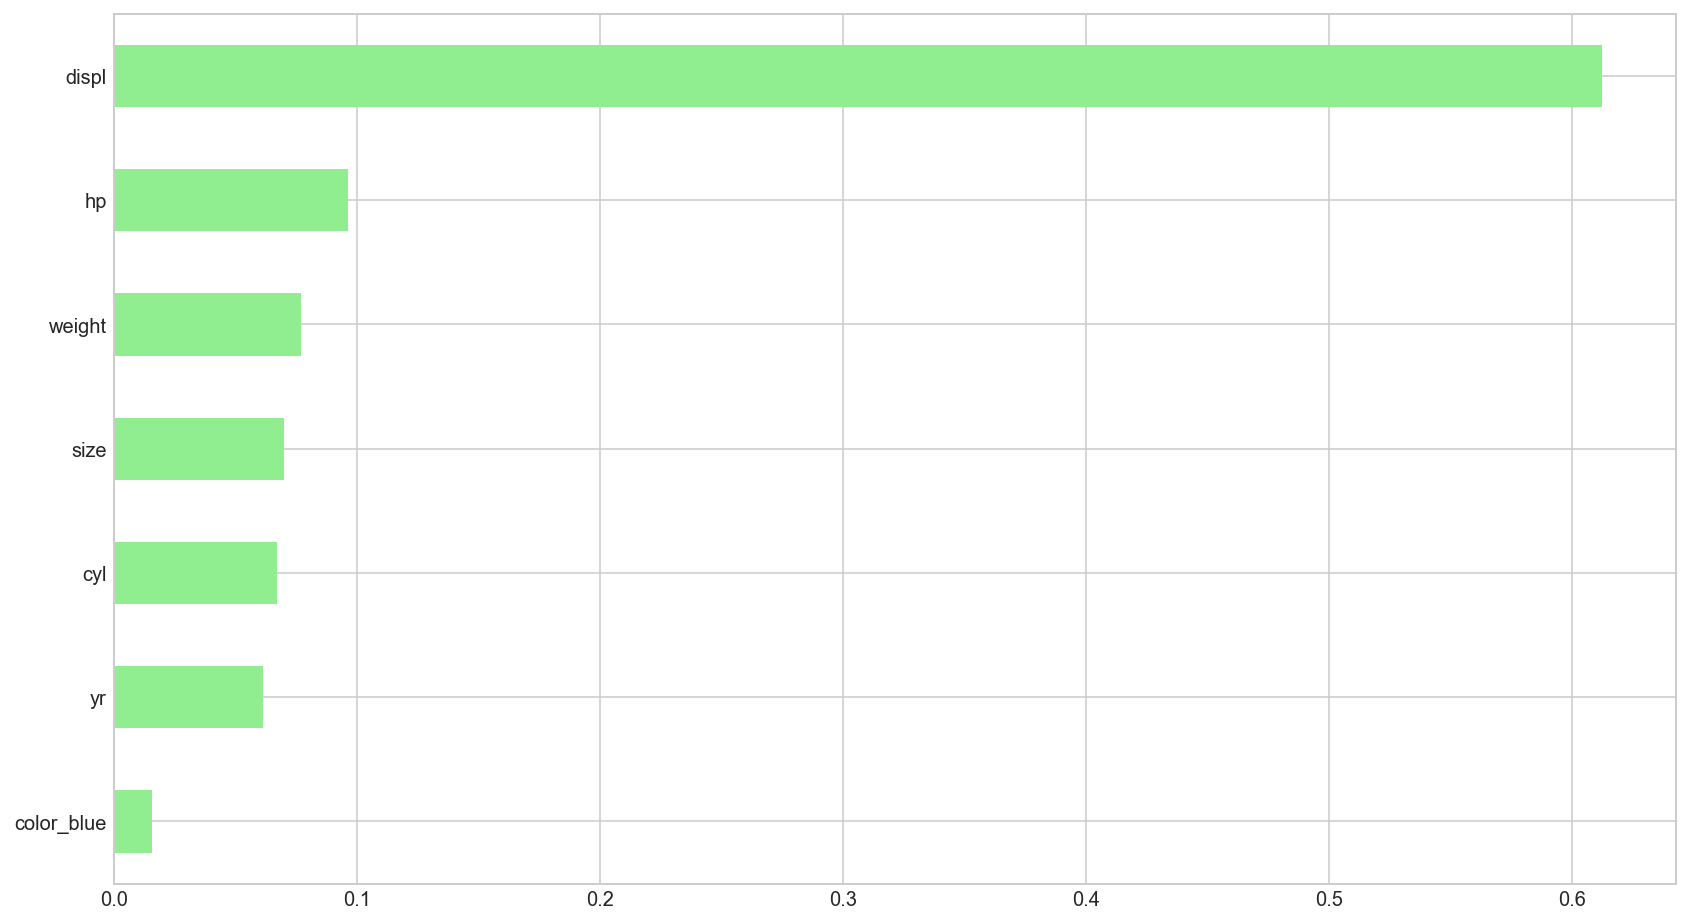

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of feature importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Filter for non-zero importances
importances_valued = sorted_importances_rf[sorted_importances_rf > 0]

# Make a horizontal bar plot
importances_valued.plot(kind='barh', color='lightgreen')

plt.show()

# Bike Share Demand Dataset from Kaggle
## [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)

In [61]:
bike_share_train = pd.read_csv("bike_share_train.csv")
bike_share_train.head(15)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [62]:
y = bike_share_train["count"]

# I will attempt to split the datetime column into component yr, month, day, hour columns

In [63]:
datetime = bike_share_train.datetime
type(datetime)

pandas.core.series.Series

In [64]:
bike_share_train["year"] = [x[:4] for x in datetime]
bike_share_train["month"] = [x[5:7] for x in datetime]
bike_share_train["day"] = [x[8:10] for x in datetime]
bike_share_train["hour"] = [x[11:13] for x in datetime]

In [65]:
X = bike_share_train.drop(['datetime', 'count', 'registered', 'casual'], axis=1)

In [66]:
bike_share_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,04


In [67]:
y[:10]

0    16
1    40
2    32
3    13
4     1
5     1
6     2
7     3
8     8
9    14
Name: count, dtype: int64

In [68]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=3)

In [69]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [70]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 47.02


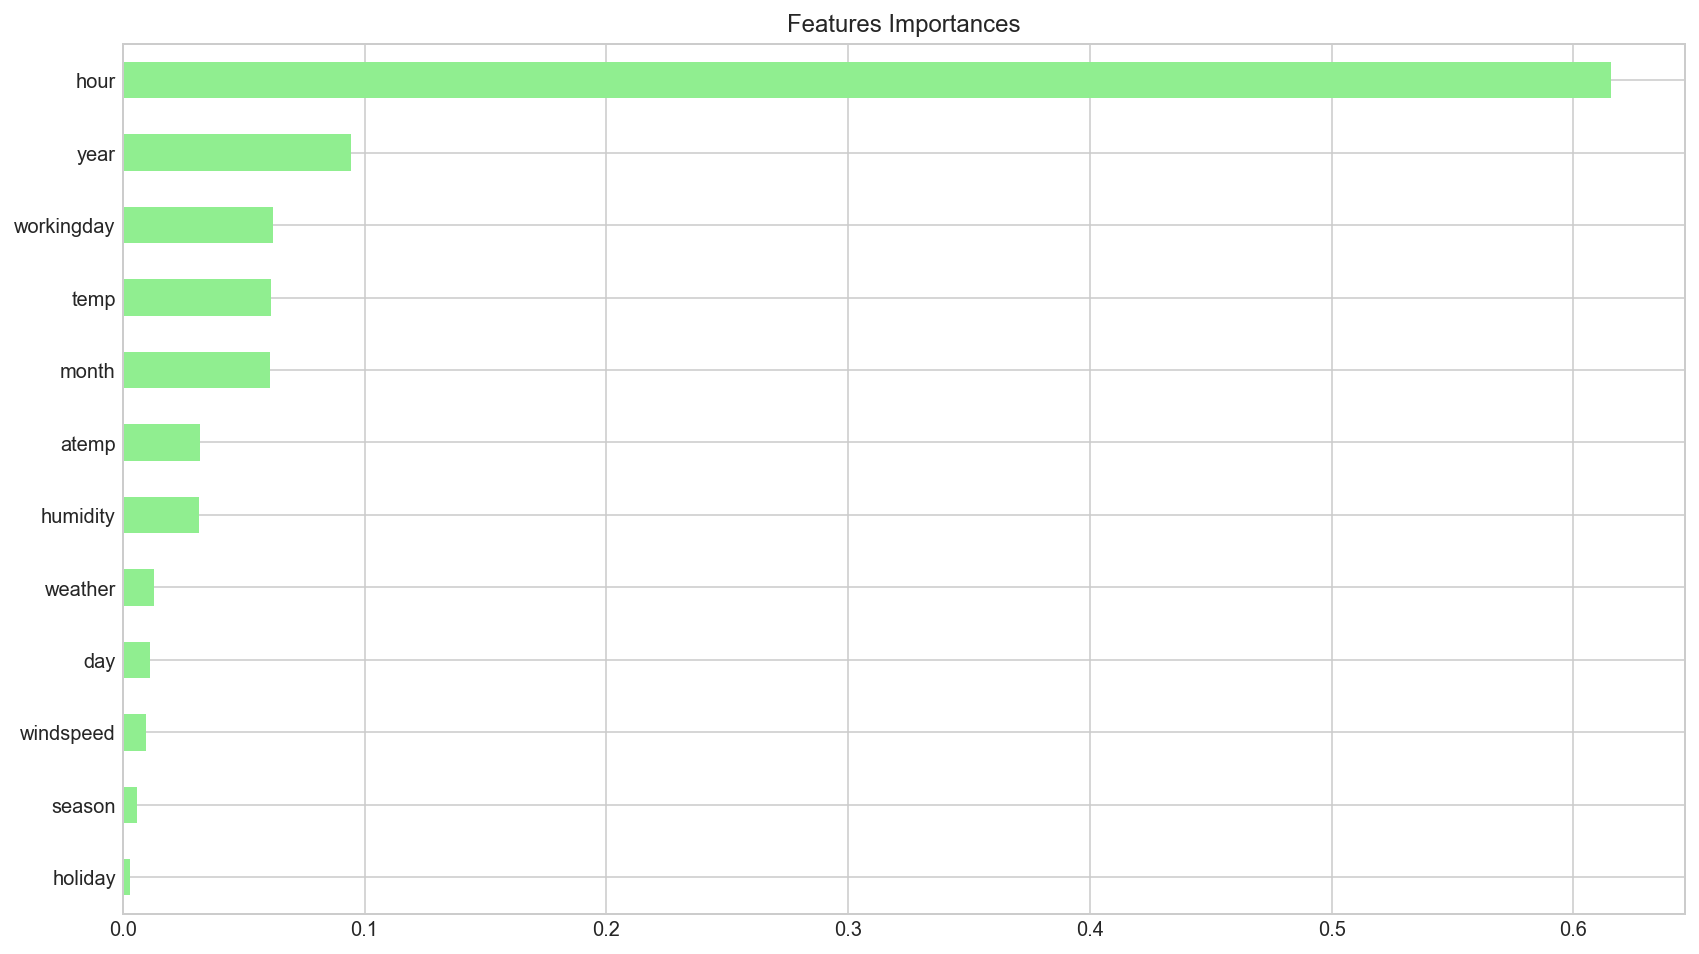

In [71]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# Boosting
- **Boosting**: Ensemble method combining several weak learners to form a strong learner.
- **Weak learner**: Model doing slightly better than random guessing.
- Example of weak learner: Decision stump (CART whose maximum depth is 1).
- Train an ensemble of predictors sequentially.
- Each predictor tries to correct its predecessor.
- Most popular boosting methods:
    - AdaBoost,
    - Gradient Boosting.

# Adaboost
- Stands for **Ada**ptive **Boost**ing.
- Each predictor pays more attention to the instances wrongly predicted by its predecessor.
- Achieved by changing the weights of training instances.
- Each predictor is assigned a coefficient $\alpha$.
- $\alpha$ depends on the predictor's training error.

# Learning Rate
- An important parameter used in training is the learning rate $\eta$.
- Learning Rate: $0 < \eta < 1$
- $\eta$ is used to shrink the coefficient $\alpha$ of a trained predictor
- **NOTE:** There is a trade-off between $\eta$ and the number of estimators.
    - A smaller value of $\eta$ should be compensated by a greater number of estimators.

# AdaBoost: Prediction
- Classification:
    - Weighted majority voting.
    - In sklearn: `AdaBoostClassifier`
- Regression:
    - Weighted average.
    - In sklearn: `AdaBoostRegressor`
**NOTE:** Individual predictors need not to be CARTS. However, CARTs are used most of the time in Boosting because of their high variance.

In [72]:
breast_cancer = pd.read_csv('wbc.csv', index_col=0)
y = breast_cancer.diagnosis

mapping = {'M':1, 'B':0}
y = y.map(mapping)

X = breast_cancer.drop('diagnosis', axis=1)
X = X.iloc[:, :30]

In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility

SEED = 1

X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=SEED)

In [74]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

# Fit 'adb_clf' to the train set
adb_clf.fit(X_train, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

In [75]:
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

In [76]:
# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

ROC AUC score: 0.99


In [77]:
url = 'indian_liver_patient_preprocessed.csv'
data = pd.read_csv(url, index_col=0)

X = data.drop(labels=['Total_Bilirubin_std',
                      'Liver_disease',
                     'Direct_Bilirubin_std',
                     'Alkaline_Phosphotase_std',
                     'Alamine_Aminotransferase_std',
                     'Aspartate_Aminotransferase_std',
                     'Albumin_std',
                     'Albumin_and_Globulin_Ratio_std',
                     'Is_male_std'], axis=1)
y = data.Liver_disease

In [78]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

In [79]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

In [80]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.99


## Gradient Boosted Trees
- Sequential correction of predecessor's errors
- Unlike adaboost, gradient boosting does not tweak the weights of training instances
- Instead, gradient boosting will fit each predictor and is trained using its predecessor's residual errors as labels
- Gradient Boosted Trees: the base learner first explored is a CART
- In sklearn: `GradientBoostingRegressor`.

In [81]:
# Load the auto dataset
auto = pd.read_csv("auto.csv")
auto_encoded = pd.get_dummies(auto)
X = auto_encoded.drop(columns='mpg')
y = auto_encoded['mpg']

In [82]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [83]:
# Instantiate a GradientBoostingRegressor 'gbt' with 300 decision stumps
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = gbt.predict(X_test)

# Evaluate the test set RSME
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 3.18


In [84]:
# Load the bike share dataset
bike_share_train = pd.read_csv("bike_share_train.csv")

y = bike_share_train["count"]

datetime = bike_share_train.datetime
bike_share_train["year"] = [x[:4] for x in datetime]
bike_share_train["month"] = [x[5:7] for x in datetime]
bike_share_train["day"] = [x[8:10] for x in datetime]
bike_share_train["hour"] = [x[11:13] for x in datetime]

X = bike_share_train.drop(['datetime', 'count', 'registered', 'casual'], axis=1)

In [85]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(n_estimators=200, 
            max_depth=4,
            random_state=2)

In [86]:
# Split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [87]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

In [88]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.604


## Stochastic Gradient Boosting (SGB)

### GB: Cons
- GB involves an exhaustive search procedure
- Each CART is trained to find the best split points and features
- May lead to CARTs using the same split points and maybe the same features

## SGB
- Each tree is trained on a random subset of rows of the training data
- The sampled instances (40%-80% of the training set) are sampled without replacement
- Features are sampled (without replacement) when choosing split points
- Result: further ensemble diversity
- Effect: adding further variance to the ensemble of trees

In [89]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [90]:
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=SEED)
# Here, the parameter subsample was set to 0.8 in order for each tree to sample 80% of the data for training. 
# Finally, the parameter max_features was set to 0.2 so that each tree uses 20% of available features 
# to perform the best-split.

In [91]:
sgbt.fit(X_train, y_train)

y_pred = sgbt.predict(X_test)

In [92]:
rsme_test = MSE(y_test, y_pred)**(1/2)

print('Test set RSME: {:.2f}'.format(rmse_test))

Test set RSME: 49.60


In [93]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
                                 subsample=0.9, 
                                 max_features=0.75, 
                                 n_estimators=200, 
                                 random_state=2)

In [94]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

In [95]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 47.893


# Tuning a CART's hyperparameters
Machine learning models are defined by parameters and hyperparameters:
- **parameters:** learned from data
    - CART example: split-point of a node, split-feature of a node, ...
- **hyperparameters:** not learned from data, set prior to training
    - CART example: `max_depth`, `min_samples_leaf`, splitting criterion, ...
## What is hyperparameter tuning?
- **Problem:** search for a set fo optimal hyperparameters for a learning algorithm.
- **Solution:** find a set of optimal hyperparameters that results in an optimal model.
- **Optimal model:** yields an optimal **score**.
- **Score:** in sklearn defaults to accuracy (classification) and $R^2$ (regression).
- Cross validation is used to estimate the generalization performance.
## Why tune hyperparameters?
- In `sklearn`, a model's default hyperparameters are not optimal for all problems.
- Hyperparameters should be tuned to obtain the best model performance.
## Approaches to hyperparameter tuning
- Grid search
- Random search
- Bayesian Optimization
- Genetic Algorithms
- ...
## Grid search cross validation
- Manually set a grid of discrete hyperparameter values
- Set a metric for scoring model performance
- Search exhaustively through the grid
- For each set of hyperparameters, evaluate each model's cross validation (CV) score
- The optimal hyperparameters are those of the model achieving the best CV score
    - Grid search suffers from the curse of dimensionality
    - The larger the grid, the longer it takes to find the solution
## Grid search cross validation: example
- Hyperparameters grids:
    - `max_depth` = {2,3,4},
    - `min_samples_leaf` = {0.05,0.1}
- hyperparameter space = { (2,0.05), (2,0.1), (3,0.05), ...}
- CV scores = $\{score_{(2,0.05)}, ...\}$
    - For each combination of hyperparameters, the cross-validation score is evaluated using k-fold CV for example.
- optimal hyperparameters = set of hyperparameters corresponding to the best CV score
## Inspecting the hyperparameters of a CART in sklearn

In [96]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Set seed to 1 for repoducibility
SEED = 1

# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)

In [97]:
# Print out dt's hyperparameters
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


```python
{'ccp_alpha': 0.0, 
 'class_weight': None, 
 'criterion': 'gini', 
 'max_depth': None, 
 'max_features': None, 
 'max_leaf_nodes': None, 
 'min_impurity_decrease': 0.0, 
 'min_impurity_split': None, 
 'min_samples_leaf': 1, 
 'min_samples_split': 2, 
 'min_weight_fraction_leaf': 0.0, 
 'random_state': 1, 
 'splitter': 'best'}
```

[sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [98]:
breast_cancer = pd.read_csv('wbc.csv', index_col=0)
y = breast_cancer.diagnosis

mapping = {'M':1, 'B':0}
y = y.map(mapping)

X = breast_cancer.drop('diagnosis', axis=1)
X = X.iloc[:, :30]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [99]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
            'max_depth': [3, 4, 5, 6],
            'min_samples_leaf': [0.04, 0.06, 0.08],
            'max_features': [0.2, 0.4, 0.6, 0.8]
            }
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1)
# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

In [100]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.06}


In [101]:
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy: {:.2f}'.format(best_CV_score))

Best CV accuracy: 0.93


In [102]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)

#Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.868


## Import the Indian Liver Patient Records
### [Dataset URL](https://www.kaggle.com/uciml/indian-liver-patient-records)

In [103]:
url = 'indian_liver_patient_preprocessed.csv'
data = pd.read_csv(url, index_col=0)

X = data.drop(labels=['Total_Bilirubin_std',
                      'Liver_disease',
                     'Direct_Bilirubin_std',
                     'Alkaline_Phosphotase_std',
                     'Alamine_Aminotransferase_std',
                     'Aspartate_Aminotransferase_std',
                     'Albumin_std',
                     'Albumin_and_Globulin_Ratio_std',
                     'Is_male_std'], axis=1)
y = data.Liver_disease

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Set seed to 1 for repoducibility
SEED = 1

# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)

In [105]:
# Define params_dt
params_dt = {'max_depth': [2,3,4], 'min_samples_leaf': [0.12,0.14,0.16,0.18]}

In [106]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

In [107]:
# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.543


# Tuning a Random Forest's Hyperparameters
## Random Forests (RF) Hyperparameters
- CART hyperparameters
- number of estimators
- bootstrap
- ...

**NOTE:** Tuning is expensive
- Hyperparameter tuning:
    - computationally expensive
    - sometimes leads to very slight improvement
- Therefore, weigh the impact of tuning on the whole project.
## Inspecting RF Hyperparameters in sklearn

In [108]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 1

# Instantiate a random forest regressor 'rf'
rf = RandomForestRegressor(random_state=SEED)

In [109]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [110]:
# Basic imports
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

#Define a grid of hyperparameters 'params_rf'
params_rf = {
             'n_estimators': [300,400,500],
             'max_depth': [4,6,8],
             'min_samples_leaf': [0.1,0.2],
             'max_features': ['log2', 'sqrt']
            }

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       n_jobs=-1,
                       verbose=1)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [111]:
# Extract best hyperparameters form 'grid_rf'
best_hyperparams = grid_rf.best_params_

print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 500}


In [112]:
# Extract best model from 'grid_rf'
best_model = grid_rf.best_estimator_
# Predict the test set labels
y_pred = best_model.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.45


In [113]:
# Load the bike share dataset
bike_share_train = pd.read_csv("bike_share_train.csv")

y = bike_share_train["count"]

datetime = bike_share_train.datetime
bike_share_train["year"] = [x[:4] for x in datetime]
bike_share_train["month"] = [x[5:7] for x in datetime]
bike_share_train["day"] = [x[8:10] for x in datetime]
bike_share_train["hour"] = [x[11:13] for x in datetime]

X = bike_share_train.drop(['datetime', 'count', 'registered', 'casual'], axis=1)

In [114]:
# Define the dictionary 'params_rf'
params_rf = {
             'n_estimators': [100,350,500],
             'min_samples_leaf': [2,10,30],
             'max_features': ['log2','auto','sqrt']
            }

In [115]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [116]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

Test RMSE of best model: 0.452
